In [51]:
import numpy as np
import numpy.random as rnd
import os

rnd.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [70]:
X = 2 * rnd.rand(100, 1)
y = 4 + 3 * X + rnd.randn(100, 1)

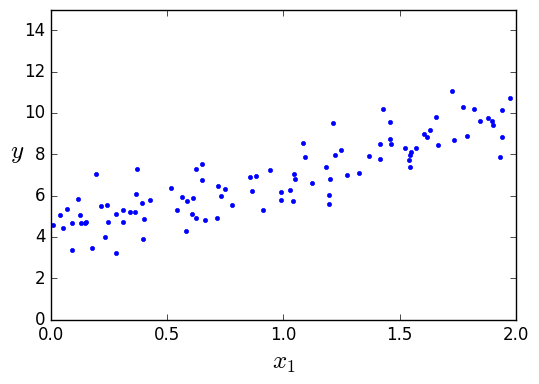

In [53]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Để tìm ra mô hình tuyến tính cho model như trên thì phải tìm ra tham số theta phù hợp nhất tới training set như trên.
Theo em đọc được trên mạng thì 1 phương pháp thường thấy để đánh gía Linear Regression đó là dùng Mean Square Error(MSE). Có nghĩa là để train được Linear Regression model thì cần tìm tham số theta để hàm MSE là nhỏ nhất.
Cái này anh đã giải thích bài trước rồi nên em không ghi cụ thể nữa, mặc dù hàm loss function của anh khác của em.

In [56]:
import numpy.linalg as LA

#Thêm 
X_b = np.c_[np.ones((100, 1)), X]  
theta_best = LA.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [60]:
print(theta_best)

[[ 4.21509616]
 [ 2.77011339]]


In [61]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 4.21509616]
 [ 9.75532293]]


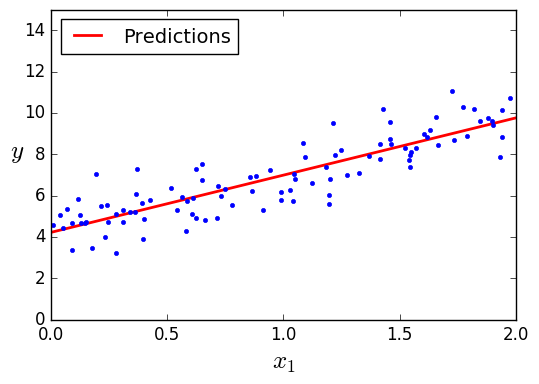

In [64]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

Với mô hình tuyến tính như trên, để tính độ dốc của hàm MSE ứng với mỗi gía trị theta khác nhau trong khi training thì em tính đạo hàm riêng(partial derivative) để xem hàm MSE thay đổi như nào. Vì X của em có 100 gía trị nên em chọn số lần lặp là 1000 lần, tuy nhiên em chỉ tính toán gradients với 10 iteration đầu tiên mà thôi.

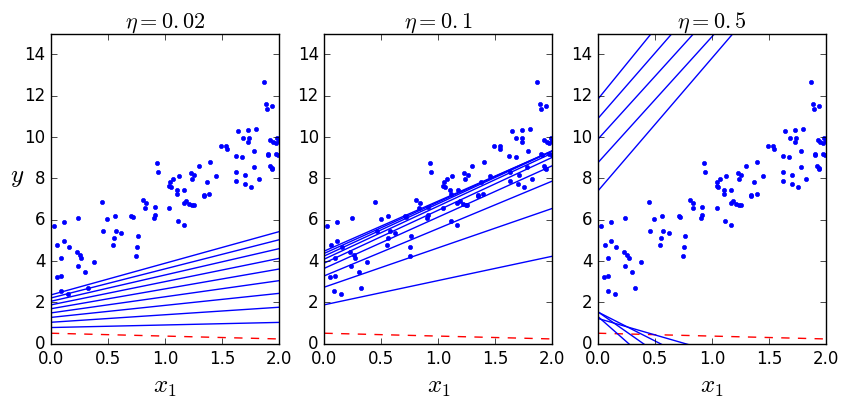

In [76]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r -- "
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

rnd.seed(42)
theta = rnd.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

Phân tích kết qủa:
Learning rate 0.02 : sau 1000 vòng lặp thuật toán vẫn chưa thể tới được mô hình tối ưu, nếu được lặp thêm vài lần nữa thì sẽ có thể đạt được kết qủa mong muốn
Learning rate 0.1 : đây là con số tương đối tốt vì chỉ sau 1 vài vòng lặp thì mô hình đã hội tụ 
Learning rate 0.5 : gía trị này qúa lớn khiến thuật toán đi sai và càng lặp thì càng đi xa khỏi mô hình tối ưu cần tìm.